In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('HR_Data.csv')

In [3]:
df.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [4]:
df.shape

(8998, 18)

In [5]:
for i in df.columns:
    print(i,': ',df[i].unique())

SLNO :  [    1     2     3 ... 12331 12332 12333]
Candidate.Ref :  [2110407 2112635 2112838 ... 3834159 3835433 3836076]
DOJ.Extended :  ['Yes' 'No']
Duration.to.accept.offer :  [ 14  18   3  26   1  17  37  16   6 120  44   7  98   0  83  32  19   4
  38  24  10  53   5  46   2  31  54  33 105  69  68  84  28 126 106  90
  21  36  34  20  13   8  42  12 103  43  60  23  67  15  45  25  47  11
  48  74  30  40  35  58  29  86  51  50  39  57  93  55  71  56  66  62
   9  64 107  27  78  22  49  92  61  79  77 108  70  82 210  80  97  41
  59  88  99  63 111  87  95  52  96  91 101  65 140  76  73 123 104  72
 117 109  89 127  81  85  75 118 114 110 129 124 116 181  94 121 119 102
 113 115 125 131 100 130 224 143 122 163]
Notice.period :  [ 30  45 120   0  75  60  90]
Offered.band :  ['E2' 'E1' 'E3' 'E0']
Pecent.hike.expected.in.CTC :  [-20.79  50.    42.84 ...  45.52   6.15  96.85]
Percent.hike.offered.in.CTC :  [ 13.16 320.    42.84 ...   0.77  35.2   45.52]
Percent.difference.CTC :  

In [6]:
df.isnull().sum()

SLNO                           0
Candidate.Ref                  0
DOJ.Extended                   0
Duration.to.accept.offer       0
Notice.period                  0
Offered.band                   0
Pecent.hike.expected.in.CTC    0
Percent.hike.offered.in.CTC    0
Percent.difference.CTC         0
Joining.Bonus                  0
Candidate.relocate.actual      0
Gender                         0
Candidate.Source               0
Rex.in.Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

## Data Analysis

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
numerical_variables=list(df.select_dtypes(exclude='object').columns)
df[numerical_variables]

,SLNO,Candidate.Ref,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age
0,1,2110407,14,30,-20.79,13.16,42.86,7,34
1,2,2112635,18,30,50.00,320.00,180.00,8,34
2,3,2112838,3,45,42.84,42.84,0.00,4,27
3,4,2115021,26,30,42.84,42.84,0.00,4,34
4,5,2115125,1,120,42.59,42.59,0.00,6,34
...,...,...,...,...,...,...,...,...,...
8993,12332,3835433,0,30,76.92,53.85,-13.04,4,34
8994,12333,3836076,2,0,45.25,14.09,-21.45,1,34
8995,12319,3822427,4,0,191.67,191.67,0.00,1,34
8996,11882,3664089,5,0,20.00,10.00,-8.33,8,34


In [9]:
categorical_variables=list(df.select_dtypes(exclude=[np.number]).columns)
df[categorical_variables]

,DOJ.Extended,Offered.band,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,LOB,Location,Status
0,Yes,E2,No,No,Female,Agency,ERS,Noida,Joined
1,No,E2,No,No,Male,Employee Referral,INFRA,Chennai,Joined
2,No,E2,No,No,Male,Agency,INFRA,Noida,Joined
3,No,E2,No,No,Male,Employee Referral,INFRA,Noida,Joined
4,Yes,E2,No,Yes,Male,Employee Referral,INFRA,Noida,Joined
...,...,...,...,...,...,...,...,...,...
8993,No,E1,No,No,Male,Direct,INFRA,Noida,Joined
8994,No,E1,No,No,Female,Employee Referral,INFRA,Chennai,Joined
8995,No,E1,No,No,Male,Employee Referral,ERS,Chennai,Joined
8996,No,E2,No,No,Male,Direct,ETS,Noida,Joined


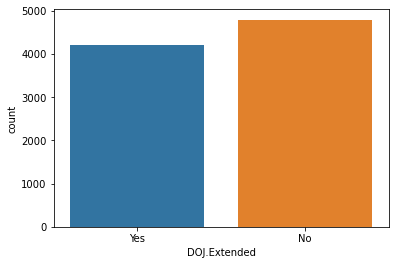

In [10]:
sns.countplot(x='DOJ.Extended',data=df)

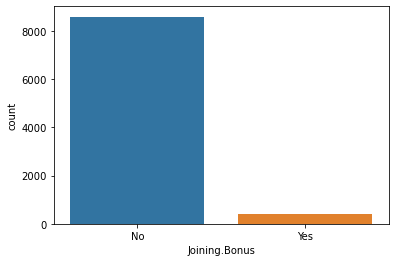

In [11]:
sns.countplot(x='Joining.Bonus',data=df)

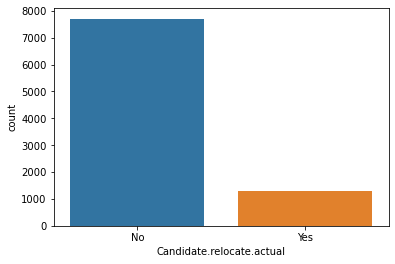

In [12]:
sns.countplot(x='Candidate.relocate.actual',data=df)

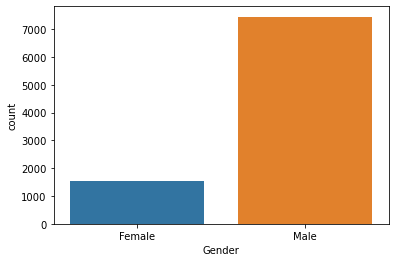

In [13]:
sns.countplot(x='Gender',data=df)

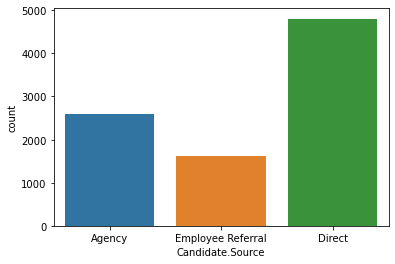

In [14]:
sns.countplot(x='Candidate.Source',data=df)

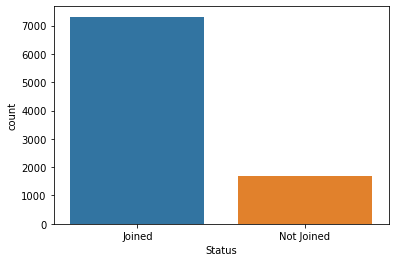

In [15]:
sns.countplot(x='Status',data=df)

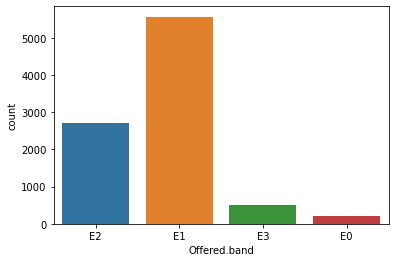

In [16]:
sns.countplot(x='Offered.band',data=df)

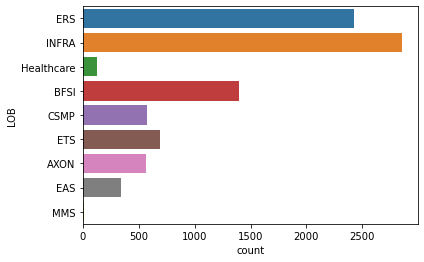

In [17]:
sns.countplot(y='LOB', data=df)

## bi-variate analysis

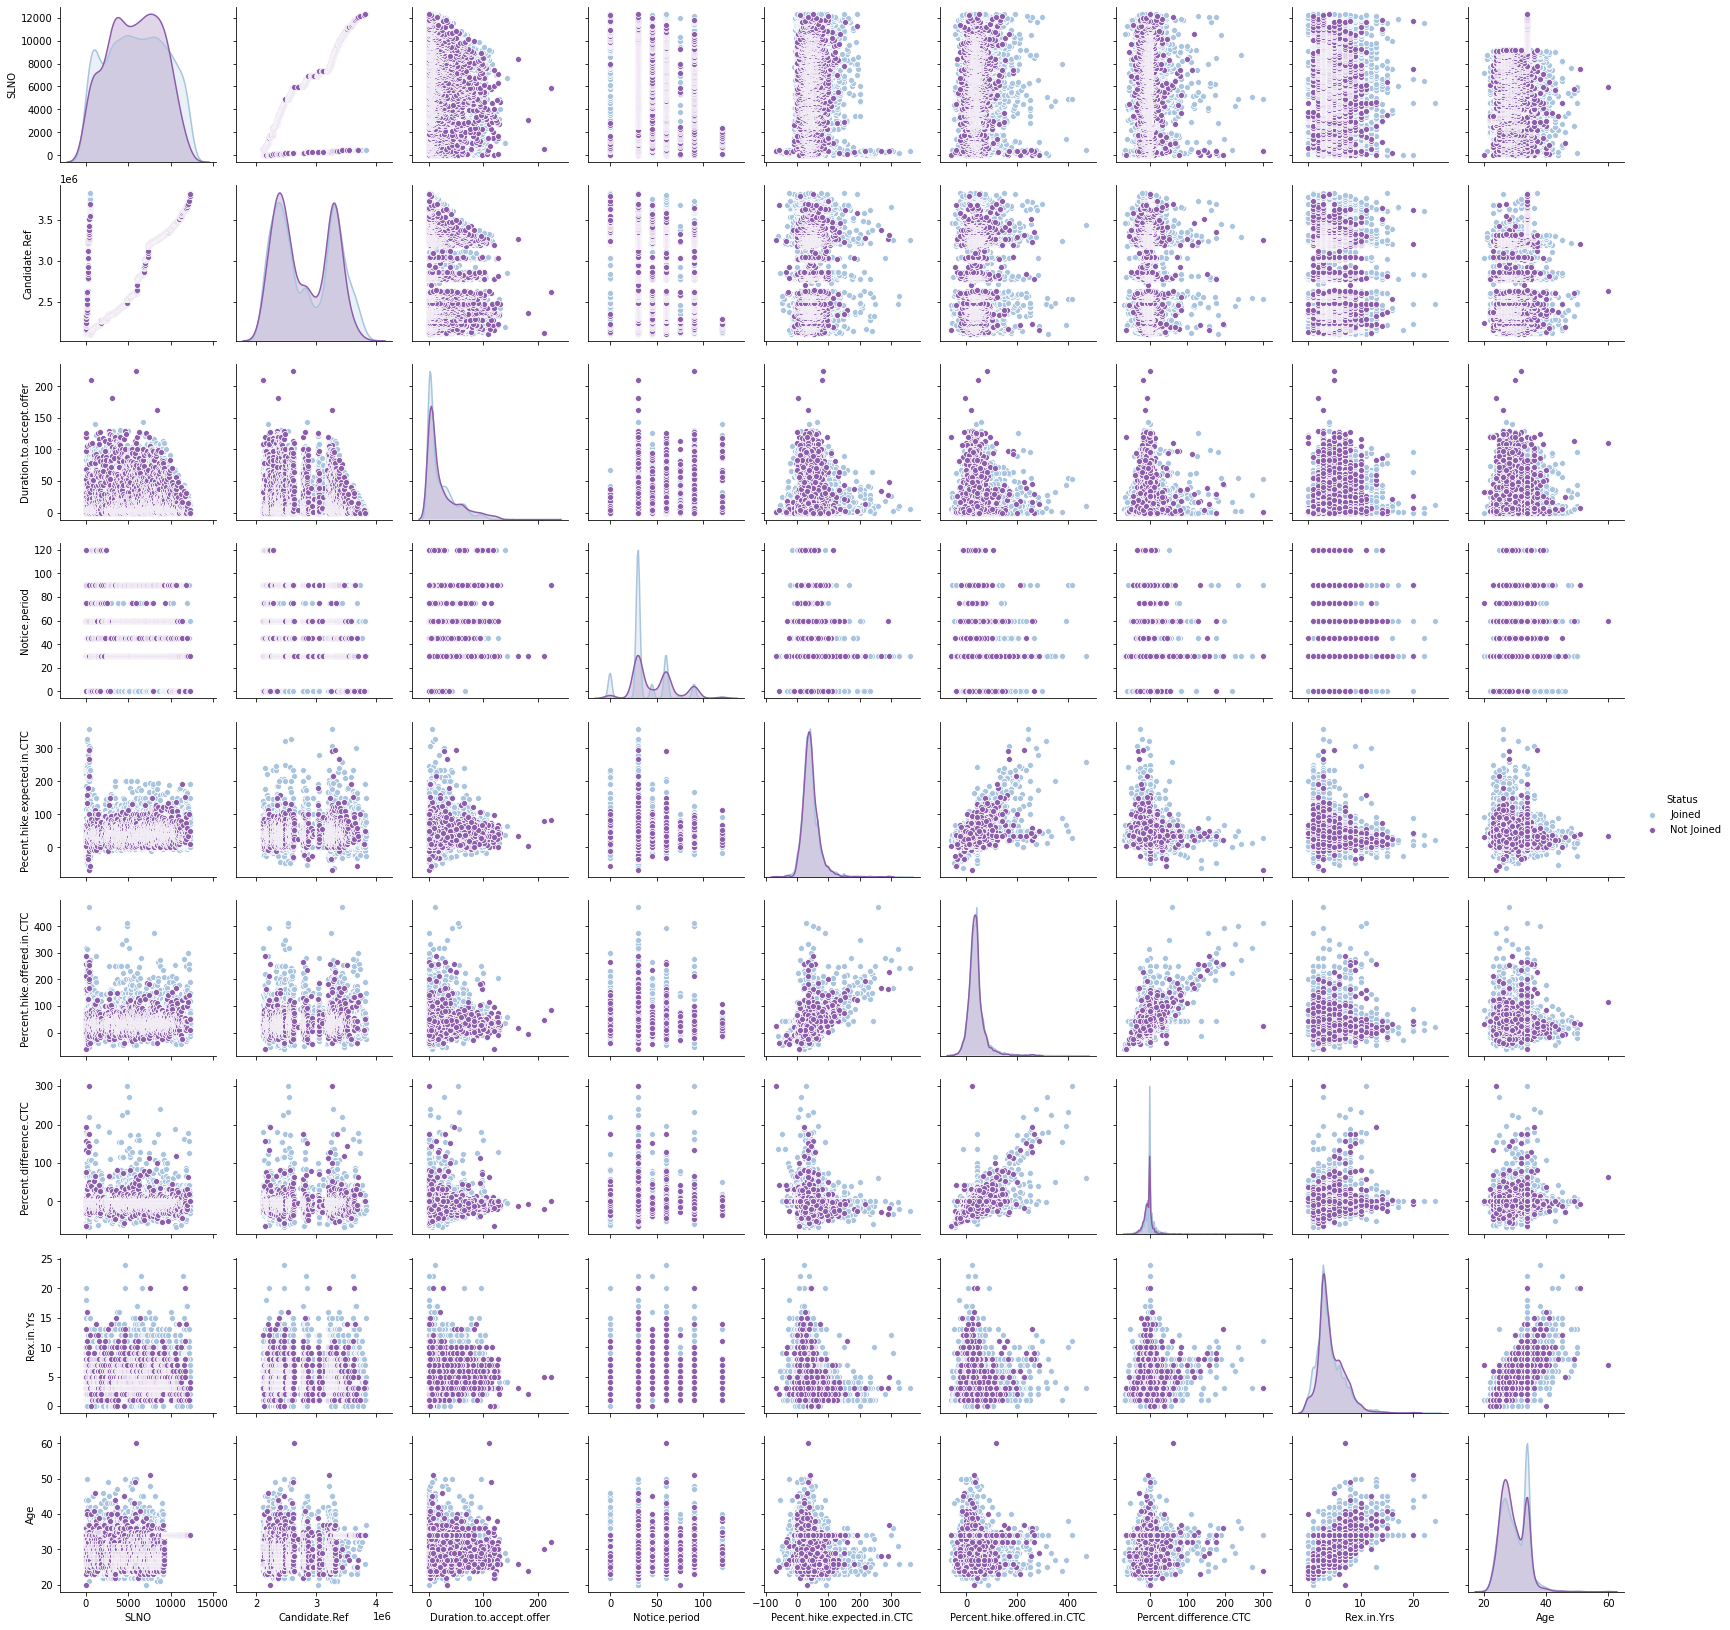

In [18]:
sns.pairplot(df, hue='Status', palette="BuPu")

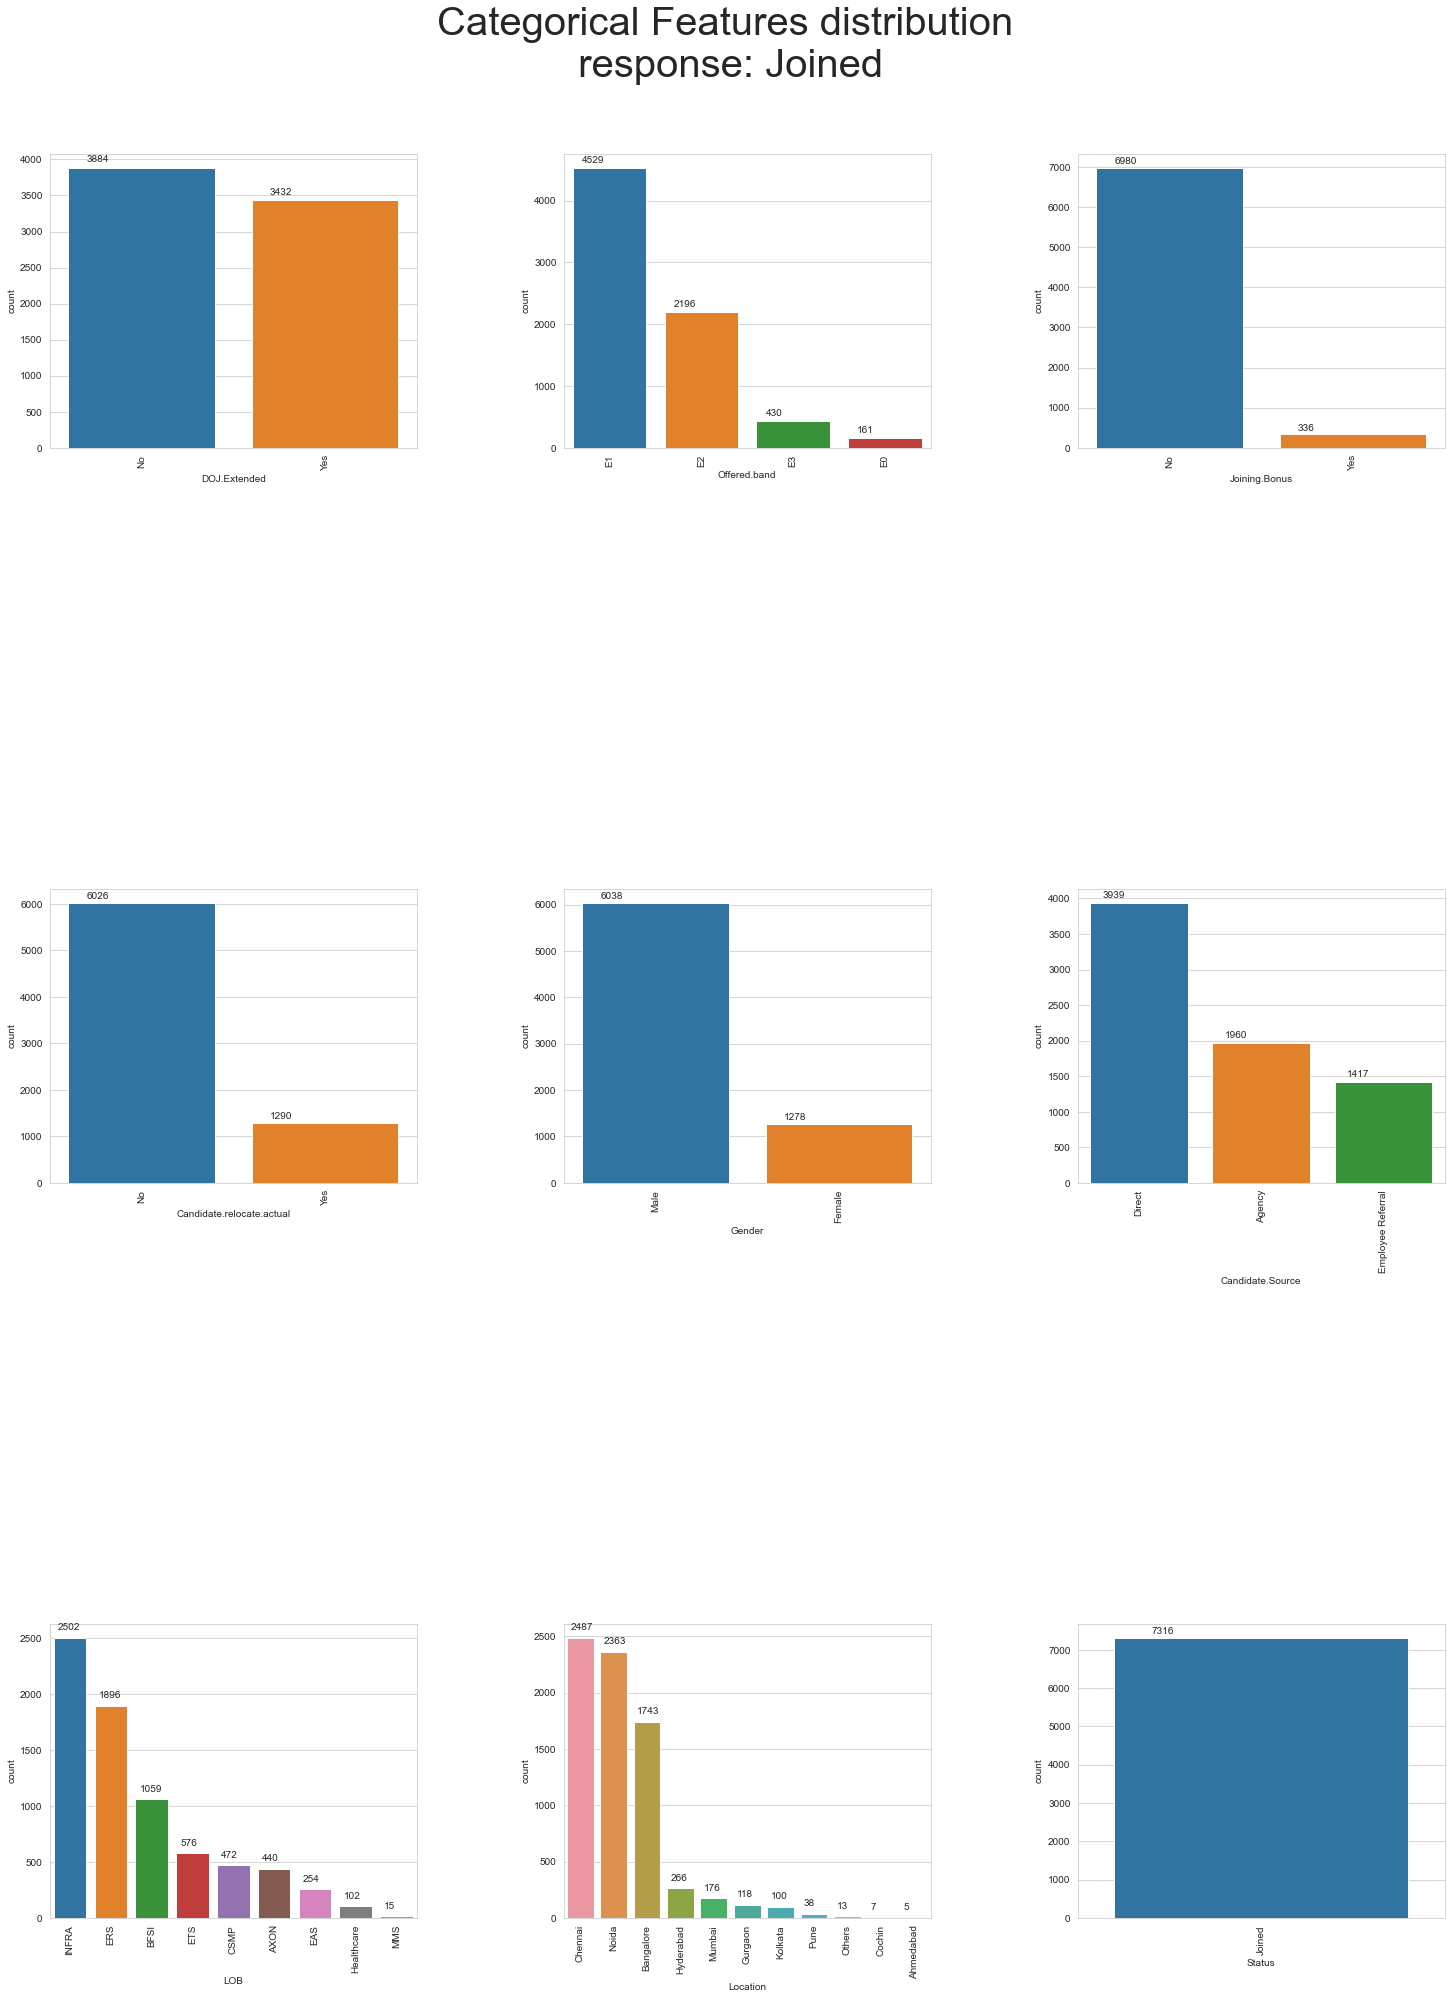

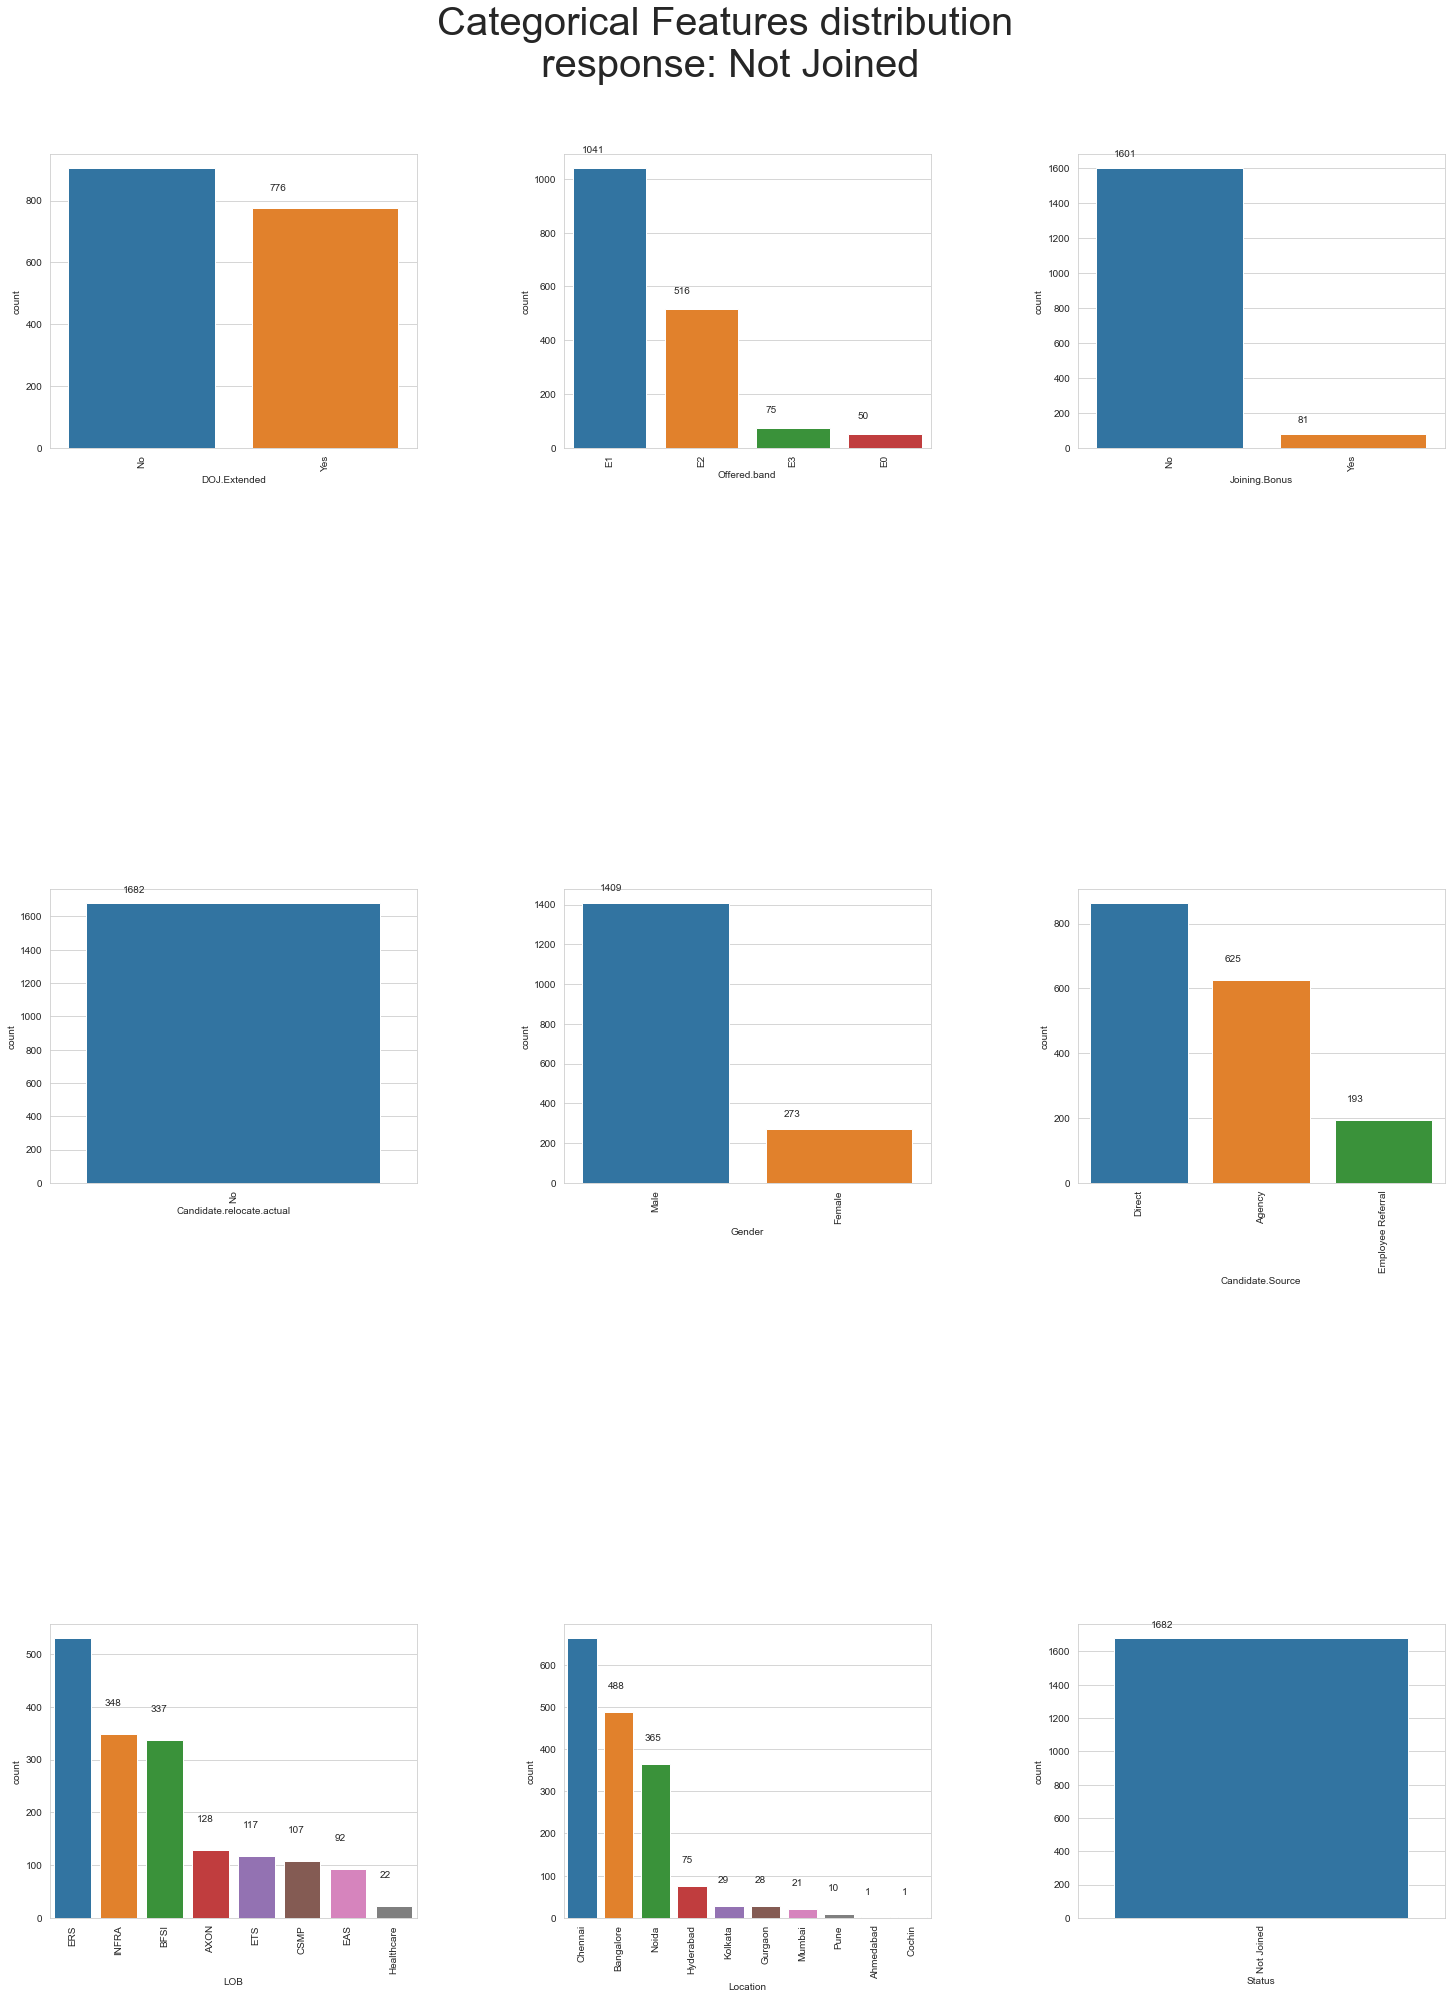

In [19]:
status= ['Joined','Not Joined']
for i in status:
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 25))
    fig.suptitle("Categorical Features distribution\n response: {}".format(i),
             horizontalalignment='center', y=1.05,
             verticalalignment='center', fontsize=40)
    fig.subplots_adjust(top=0.99, bottom=0.01, hspace=1.5, wspace=0.4)
    for ax, c in list(zip(axes.flat, categorical_variables)):        
        sns.countplot(c, data=df[df['Status']=='{}'.format(i)],order= df[df['Status']=='{}'.format(i)][c].value_counts().index,ax=ax)
        for p in ax.patches:
            ax.annotate("{}".format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),
                       ha='left', va='bottom')
        ax.tick_params(labelrotation=90)  
        plt.sca(ax)
        plt.yticks(rotation=0)    

In [20]:
dfresponse = df.groupby("Status")
groupby_not_joined = "Not Joined"
groupby_joined = "Joined"
noo = dfresponse.get_group(groupby_not_joined)
yess =dfresponse.get_group(groupby_joined)

Text(0, 0.5, 'Count')

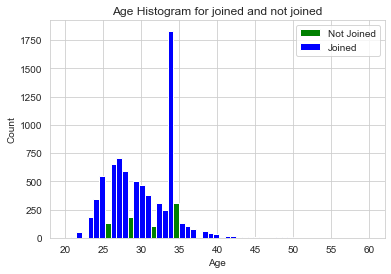

In [21]:
plt.figure()
plt.hist(noo['Age'], bins=40, label=groupby_not_joined,color='green')
plt.hist(yess['Age'], bins=40, label=groupby_joined,color='blue')
plt.legend()
plt.title("Age Histogram for joined and not joined")
plt.xlabel("Age")
plt.ylabel("Count")

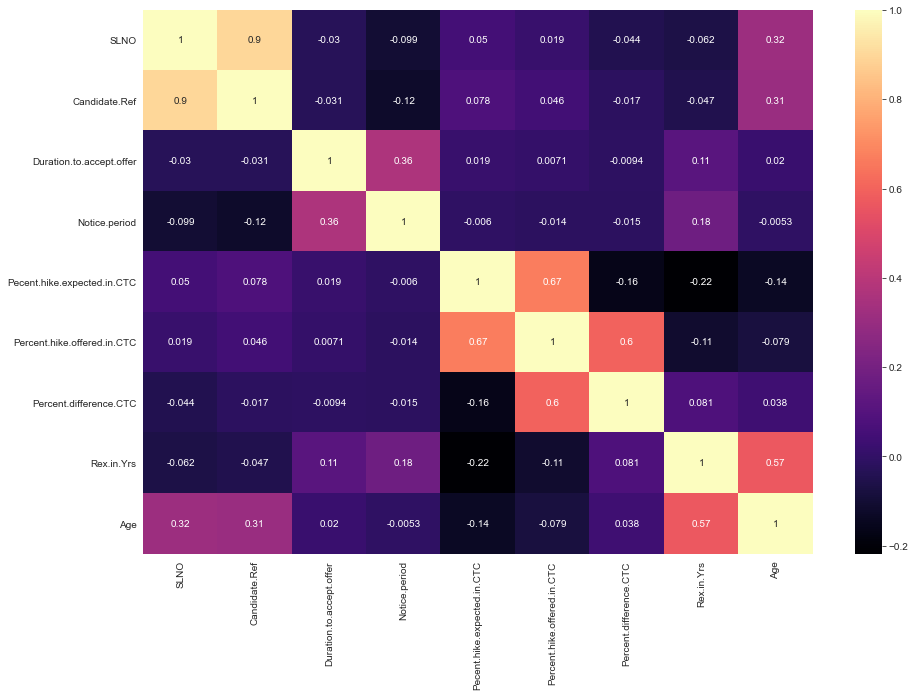

In [22]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(method='pearson'), annot=True,cmap='magma')

In [23]:
df.Status.value_counts()

Joined        7316
Not Joined    1682
Name: Status, dtype: int64

In [24]:
def change(a):
    return a.map({'Not Joined':0,'Joined':1})
df[['Status']]=df[['Status']].apply(change)

In [25]:
df.Status.value_counts()

1    7316
0    1682
Name: Status, dtype: int64

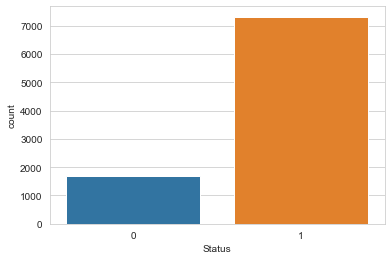

In [26]:
sns.countplot(x='Status',data=df)

## Numerical Variables Visualization

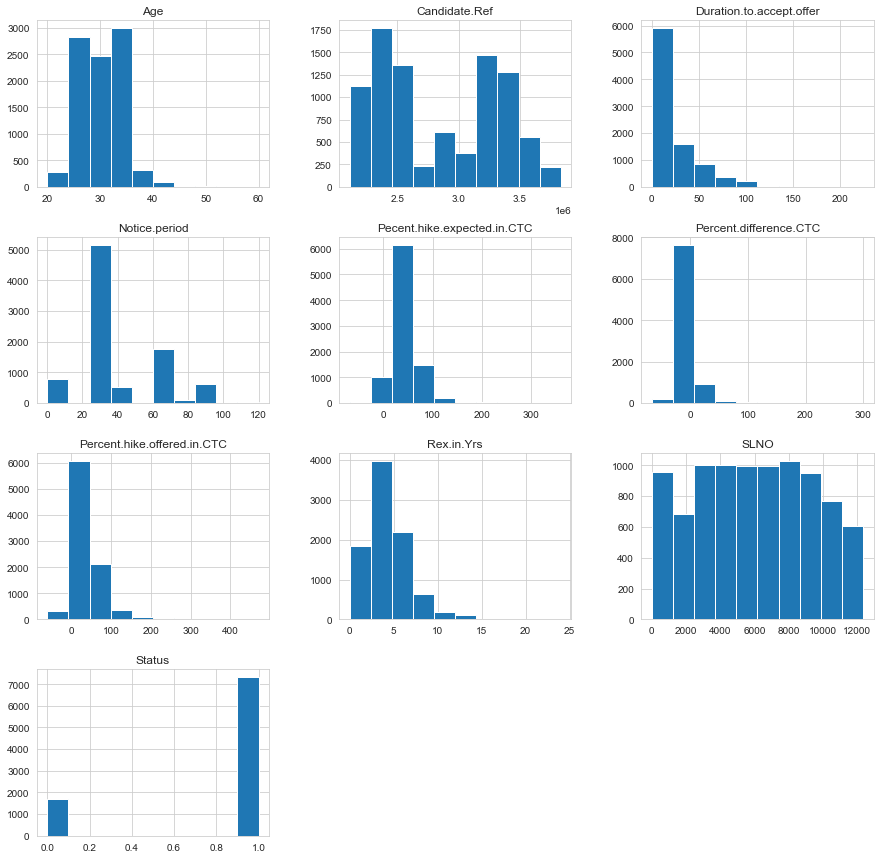

In [27]:
new=df.hist(figsize=(15,15)) 

In [28]:
def table(df,a,b):
    LOB=list(df[a].unique())
    Candidate_Source=list(df[b].unique())
    dataframes=[]
    for x in Candidate_Source:
        go=df[df[b]==x]
        gojob=go.groupby(a).count()[b]
        dataframes.append(gojob)
    t=pd.concat(dataframes,axis=1)
    t.columns=Candidate_Source
    t=t.fillna(0)
    return t

table(df,'LOB','Candidate.Source')

,Agency,Employee Referral,Direct
LOB,,,
AXON,77,79,412
BFSI,533,169,694
CSMP,122,92,365
EAS,46,64,236
ERS,1151,323,953
ETS,112,107,474
Healthcare,19,12,93
INFRA,524,763,1563
MMS,1,1,13


### The necessary transformations for the categorical variables and the numeric variables

In [29]:
df[categorical_variables]

,DOJ.Extended,Offered.band,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,LOB,Location,Status
0,Yes,E2,No,No,Female,Agency,ERS,Noida,1
1,No,E2,No,No,Male,Employee Referral,INFRA,Chennai,1
2,No,E2,No,No,Male,Agency,INFRA,Noida,1
3,No,E2,No,No,Male,Employee Referral,INFRA,Noida,1
4,Yes,E2,No,Yes,Male,Employee Referral,INFRA,Noida,1
...,...,...,...,...,...,...,...,...,...
8993,No,E1,No,No,Male,Direct,INFRA,Noida,1
8994,No,E1,No,No,Female,Employee Referral,INFRA,Chennai,1
8995,No,E1,No,No,Male,Employee Referral,ERS,Chennai,1
8996,No,E2,No,No,Male,Direct,ETS,Noida,1


In [30]:
abc=['DOJ.Extended','Joining.Bonus','Candidate.relocate.actual']
def conversion(p):
    return p.map({'No':0,'Yes':1})

for x in abc:
    df[[x]]=df[[x]].apply(conversion)
    
abc=['Offered.band','Gender','Candidate.Source','LOB','Location']
for i in abc:
    dum=pd.get_dummies(df[i],drop_first=True)
    df=pd.concat([df,dum],axis=1)
    df.drop([i],axis=1,inplace=True)

In [31]:
df=df.drop(['Candidate.Ref','SLNO'],axis=1)

In [32]:
df.head()

,DOJ.Extended,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Rex.in.Yrs,Age,...,Bangalore,Chennai,Cochin,Gurgaon,Hyderabad,Kolkata,Mumbai,Noida,Others,Pune
0,1,14,30,-20.79,13.16,42.86,0,0,7,34,...,0,0,0,0,0,0,0,1,0,0
1,0,18,30,50.00,320.00,180.00,0,0,8,34,...,0,1,0,0,0,0,0,0,0,0
2,0,3,45,42.84,42.84,0.00,0,0,4,27,...,0,0,0,0,0,0,0,1,0,0
3,0,26,30,42.84,42.84,0.00,0,0,4,34,...,0,0,0,0,0,0,0,1,0,0
4,1,1,120,42.59,42.59,0.00,0,1,6,34,...,0,0,0,0,0,0,0,1,0,0


In [33]:
df.columns

Index(['DOJ.Extended', 'Duration.to.accept.offer', 'Notice.period',
       'Pecent.hike.expected.in.CTC', 'Percent.hike.offered.in.CTC',
       'Percent.difference.CTC', 'Joining.Bonus', 'Candidate.relocate.actual',
       'Rex.in.Yrs', 'Age', 'Status', 'E1', 'E2', 'E3', 'Male', 'Direct',
       'Employee Referral', 'BFSI', 'CSMP', 'EAS', 'ERS', 'ETS', 'Healthcare',
       'INFRA', 'MMS', 'Bangalore', 'Chennai', 'Cochin', 'Gurgaon',
       'Hyderabad', 'Kolkata', 'Mumbai', 'Noida', 'Others', 'Pune'],
      dtype='object')

## Train Test Split

In [34]:
X=df.drop('Status', axis=1)
y=df['Status']

## Predictive model using Logistic regression

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [36]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=5)

In [37]:
X_train

,DOJ.Extended,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Rex.in.Yrs,Age,...,Bangalore,Chennai,Cochin,Gurgaon,Hyderabad,Kolkata,Mumbai,Noida,Others,Pune
4127,1,68,30,23.29,16.04,-5.88,0,0,11,35,...,0,1,0,0,0,0,0,0,0,0
7139,1,15,30,44.44,11.11,-23.08,0,0,7,34,...,1,0,0,0,0,0,0,0,0,0
2942,1,107,30,7.69,-15.38,-21.43,0,0,6,31,...,0,1,0,0,0,0,0,0,0,0
3151,1,27,30,53.69,53.69,0.00,0,0,3,26,...,0,1,0,0,0,0,0,0,0,0
3609,1,55,90,50.00,400.00,233.33,0,0,10,38,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,1,34,60,47.37,36.84,-7.14,0,0,3,34,...,0,0,0,0,0,0,0,1,0,0
3046,0,1,30,37.50,20.00,-12.73,0,0,3,27,...,0,0,0,0,0,0,1,0,0,0
4079,1,33,60,50.00,41.67,-5.56,0,0,4,26,...,1,0,0,0,0,0,0,0,0,0
2254,0,2,30,42.86,42.86,0.00,0,0,0,24,...,0,0,0,0,0,0,0,1,0,0


In [38]:
y_test

2956    1
5523    1
8952    1
3418    1
3037    1
       ..
1934    1
8675    1
1081    1
4217    1
5526    1
Name: Status, Length: 1800, dtype: int64

In [39]:
logmodel=LogisticRegression()

In [40]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [41]:
predictions=logmodel.predict(X_test)

In [42]:
from sklearn.metrics import classification_report

In [43]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.63      0.07      0.13       330\n           1       0.83      0.99      0.90      1470\n\n    accuracy                           0.82      1800\n   macro avg       0.73      0.53      0.52      1800\nweighted avg       0.79      0.82      0.76      1800\n'

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
confusion_matrix(y_test,predictions)

array([[  24,  306],
       [  14, 1456]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test,predictions)

0.8222222222222222

### Here we get accuracy about 82% which is  a very good result

### Predicted values

In [48]:
values=pd.DataFrame({'Actual Values':y_test,'Predticted Values':predictions,'Difference': y_test-predictions})

In [49]:
values[0:20]

,Actual Values,Predticted Values,Difference
2956,1,1,0
5523,1,1,0
8952,1,1,0
3418,1,1,0
3037,1,1,0
3734,0,0,0
4083,0,0,0
1043,1,1,0
8811,1,1,0
7339,1,1,0
